## Credit Card Fraud Detecting AI

### Data Loading and Data Cleaning

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Explore Data

In [10]:
# Create a data backup
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# How many frauds transaction
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
# Outlier detection on 'Amount' column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Amount'] >= lower) & (df['Amount'] <= upper)]


# We will remove outliers from non_fraud since there are very less fraudulent data
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

non_fraud = non_fraud[(non_fraud['Amount'] >= lower) & (non_fraud['Amount'] <= upper)]

df = pd.concat([non_fraud, fraud])
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,...,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000
mean,94986.492228,0.094504,0.230435,0.060689,-0.019030,0.116567,-0.059286,-0.083767,0.024857,0.008731,...,-0.018557,0.002675,0.006637,0.001982,0.002301,-0.001892,0.002238,-0.001567,34.974887,0.001586
std,47594.978003,1.820271,1.293522,1.471043,1.393801,1.214682,1.264431,1.038737,1.156919,1.081381,...,0.705072,0.714132,0.433929,0.602656,0.505696,0.469089,0.371147,0.266247,42.172250,0.039788
min,0.000000,-40.470142,-47.429676,-33.680984,-5.683171,-23.669726,-23.496714,-43.557242,-41.484823,-13.434066,...,-22.797604,-8.887017,-36.666000,-2.836627,-7.495741,-1.732008,-9.895244,-8.478686,0.000000,0.000000
25%,54533.500000,-0.859648,-0.397907,-0.816557,-0.850251,-0.567459,-0.793053,-0.576955,-0.196253,-0.615814,...,-0.237517,-0.544744,-0.141823,-0.355170,-0.314581,-0.322206,-0.063949,-0.054103,4.490000,0.000000
50%,85041.000000,0.035238,0.165842,0.225603,-0.024476,0.021158,-0.318741,0.016034,0.029424,-0.045243,...,-0.047347,0.005992,-0.005033,0.040299,0.012927,-0.041085,0.006947,0.008817,16.000000,0.000000
75%,139586.000000,1.356675,0.878353,1.067617,0.717123,0.666514,0.311231,0.515631,0.335343,0.583818,...,0.158554,0.528770,0.141507,0.439066,0.349265,0.229586,0.096233,0.072347,49.990000,0.000000
max,172788.000000,2.454930,22.057729,4.226108,12.114672,34.099309,8.933762,6.491054,20.007208,10.392889,...,27.202839,8.361985,22.083545,4.022866,7.519589,3.463246,8.254376,22.620072,184.500000,1.000000


### EDA 
- First we will construct a bar chart(for imbalance) then a pie chart to show distribution of fraud and non-fraud
- Then an Histogram of Amounts
- Then we will do Time Analysis

/tmp/ipykernel_4760/2906915343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['skyblue', 'tomato'])


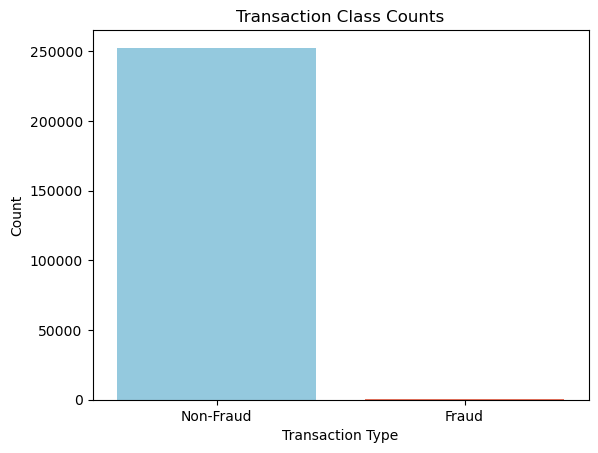

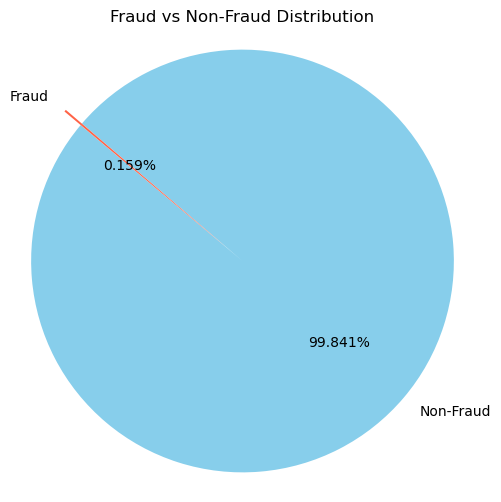

In [15]:
# Bar chart (better for imbalance)
sns.countplot(x='Class', data=df, palette=['skyblue', 'tomato'])
plt.title('Transaction Class Counts')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Pie chart
labels = ['Non-Fraud', 'Fraud']
sizes = df['Class'].value_counts()
colors = ['skyblue', 'tomato']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', colors=colors, startangle=140, explode=(0, 0.1))
plt.title("Fraud vs Non-Fraud Distribution")
plt.axis('equal')
plt.show()

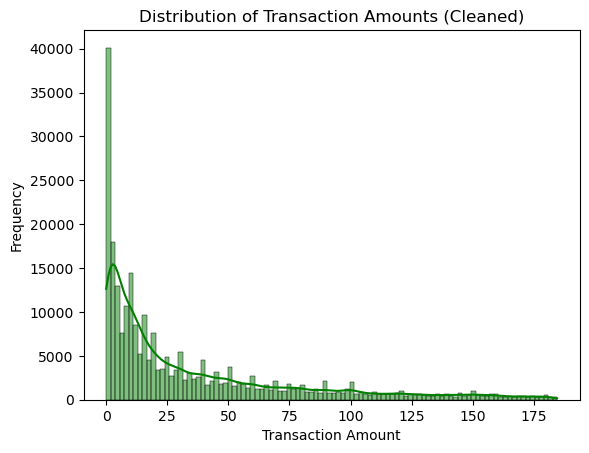

In [18]:
# Histogram of Amounts
sns.histplot(df['Amount'], bins=100, kde=True, color='green')
plt.title("Distribution of Transaction Amounts (Cleaned)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

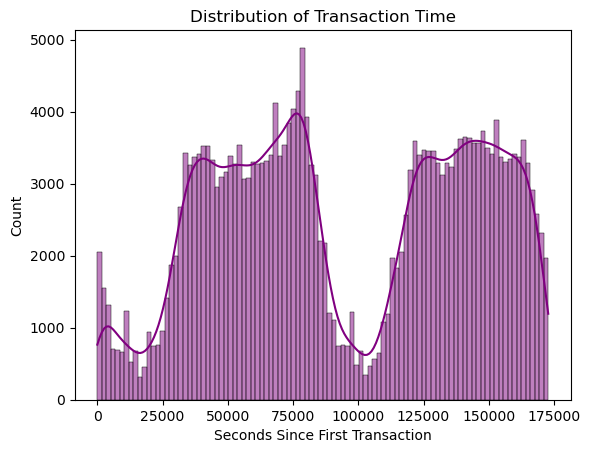

In [16]:
# Time Analysis
sns.histplot(df['Time'], bins=100, kde=True, color='purple')
plt.title("Distribution of Transaction Time")
plt.xlabel("Seconds Since First Transaction")
plt.ylabel("Count")
plt.show()


### Class-wise analysis(Fraud vs. Non-fraud)

/tmp/ipykernel_4760/1377708557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['skyblue', 'tomato'])


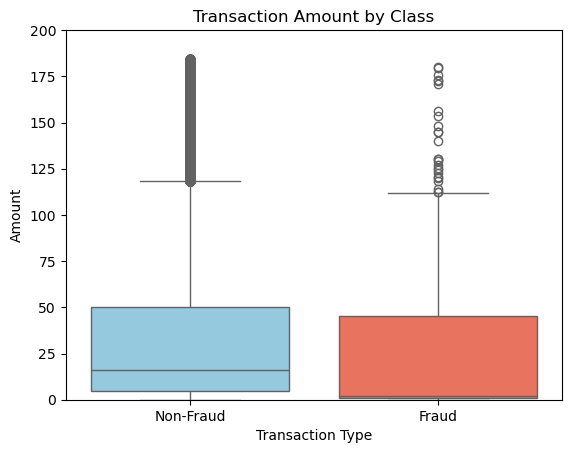

In [19]:
# Transaction amount compared by class
sns.boxplot(x='Class', y='Amount', data=df, palette=['skyblue', 'tomato'])
plt.title("Transaction Amount by Class")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.ylim(0, 200)  # Focus on typical range
plt.show()


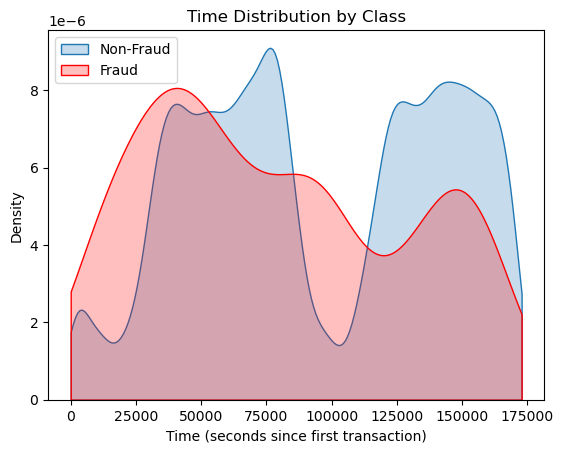

In [22]:
# Time patterns by class
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', fill=True, clip=(0, df['Time'].max()))
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True, color='red', clip=(0, df['Time'].max()))
plt.title("Time Distribution by Class")
plt.xlabel("Time (seconds since first transaction)")
plt.legend()
plt.show()

### We are doing fraud detection by taking some columns(V1, V2 and V3)

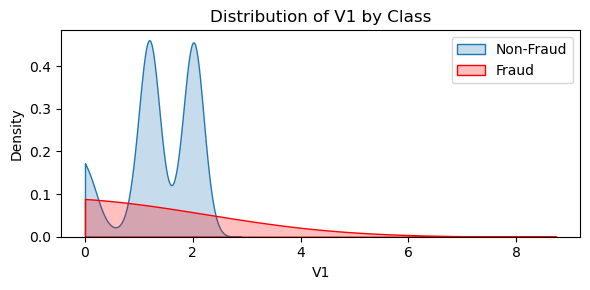

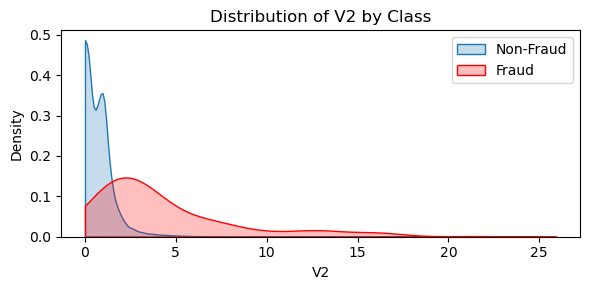

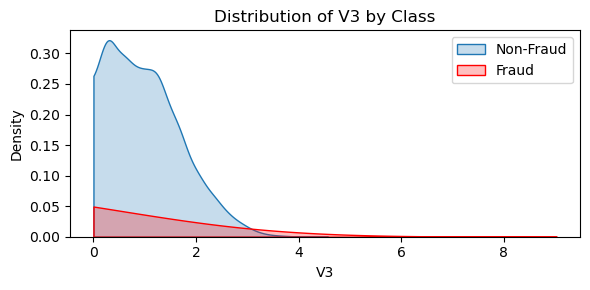

In [23]:
for col in ['V1', 'V2', 'V3']:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(df[df['Class'] == 0][col], label='Non-Fraud', fill=True, clip=(0, df['Time'].max()))
    sns.kdeplot(df[df['Class'] == 1][col], label='Fraud', fill=True, color='red', clip=(0, df['Time'].max()))
    plt.title(f"Distribution of {col} by Class")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Feature Scaling

In [25]:
scaler = StandardScaler()
df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[['Amount', 'Time']])

# Drop original columns if you prefer
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Move new scaled features to the beginning
scaled_cols = ['scaled_amount', 'scaled_time']
remaining_cols = [col for col in df.columns if col not in scaled_cols]
df = df[scaled_cols + remaining_cols]

# Confirm shape and sample
print(df.shape)
df.head()

(252903, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.718502,-1.995729,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.765550,-1.995729,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
3,2.099136,-1.995708,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.830290,-1.995687,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.742312,-1.995687,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0


## Export the df to a creditcard_cleaned.csv

In [26]:
df.to_csv("creaditcard_cleaned.csv", index=False)

#### This marks the completion of Data Preprocessing and now in the next file we will train the model on the cleaned csv file